In [14]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import importlib

module_path = '/Users/morton/PycharmProjects/psifr'
if module_path not in sys.path:
    sys.path.append(module_path)
from psifr import fr
data_file = os.path.join(module_path, 'data', 'cfr_raw_data.csv')

In [17]:
df = pd.read_csv(data_file, dtype={'category': 'category'})
df.category.cat.as_ordered(inplace=True)

study = df.query('trial_type == "study"').copy()
recall = df.query('trial_type == "recall"').copy()
data = fr.merge_lists(study, recall, list_keys=['list_type', 'list_category'], study_keys=['category'])

In [18]:
data

,subject,list,item,input,output,recalled,repeat,intrusion,list_type,list_category,category
0,1,1,TOWEL,1.0,13.0,True,0,False,pure,obj,obj
1,1,1,LADLE,2.0,NaN,False,0,False,pure,obj,obj
2,1,1,THERMOS,3.0,NaN,False,0,False,pure,obj,obj
3,1,1,LEGO,4.0,18.0,True,0,False,pure,obj,obj
4,1,1,BACKPACK,5.0,10.0,True,0,False,pure,obj,obj
...,...,...,...,...,...,...,...,...,...,...,...
48168,47,48,ALEX RODRIGUEZ,20.0,6.0,True,0,False,mixed,mixed,cel
48169,47,48,AL PACINO,21.0,4.0,True,0,False,mixed,mixed,cel
48170,47,48,NELSON MANDELA,22.0,3.0,True,0,False,mixed,mixed,cel
48171,47,48,VIN DIESEL,23.0,2.0,True,0,False,mixed,mixed,cel


In [3]:
%%time
importlib.reload(fr)
crp = fr.lag_crp(data)

CPU times: user 1.17 s, sys: 8.81 ms, total: 1.17 s
Wall time: 1.18 s


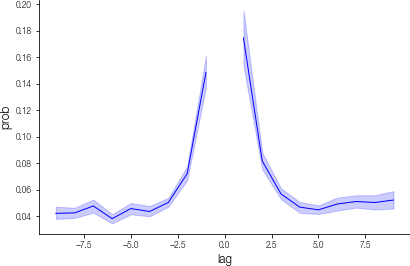

In [4]:
sns.lineplot(x='lag', y='prob', data=crp.query('-10 < lag < 0').reset_index(), color='b');
sns.lineplot(x='lag', y='prob', data=crp.query('10 > lag > 0').reset_index(), color='b');

In [5]:
pure = data.loc[data['list_type'] == 'pure']
crp_by_cat = pure.groupby(['category']).apply(fr.lag_crp)

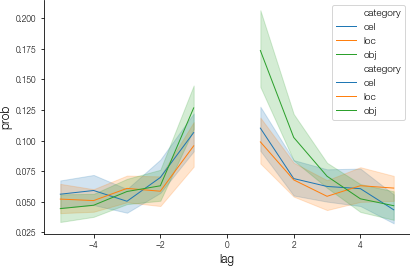

In [6]:
sns.lineplot(x='lag', y='prob', hue='category', 
             data=crp_by_cat.query('-5 <= lag < 0').reset_index());
sns.lineplot(x='lag', y='prob', hue='category', 
             data=crp_by_cat.query('5 >= lag > 0').reset_index());

In [13]:
importlib.reload(fr)
def cat_crp(df):
    category = df['category'].dropna().unique()[0]
    crp = fr.lag_crp(df, test_key='category', 
                     test=lambda x, y: (x == category) and (np.array(y) == category))
    return crp

mixed = data.loc[data['list_type'] == 'mixed']
crp_by_cat = mixed.groupby(['category']).apply(cat_crp)

IndexError: index 16 is out of bounds for axis 0 with size 8

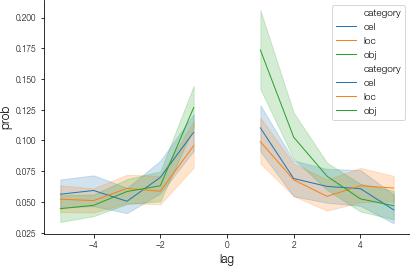

In [12]:
sns.lineplot(x='lag', y='prob', hue='category', 
             data=crp_by_cat.query('-5 <= lag < 0').reset_index());
sns.lineplot(x='lag', y='prob', hue='category', 
             data=crp_by_cat.query('5 >= lag > 0').reset_index());

In [6]:
mixed = data.loc[data['list_type'] == 'mixed']
within_crp = fr.lag_crp(mixed, test_key='category', test=lambda x, y: x == y)
between_crp = fr.lag_crp(mixed, test_key='category', test=lambda x, y: x != y)

In [14]:
importlib.reload(fr)
mixed = data.loc[data['list_type'] == 'mixed']
within_crp = fr.lag_crp(mixed, category_key='category', category_filter='within')
between_crp = fr.lag_crp(mixed, category_key='category', category_filter='between')

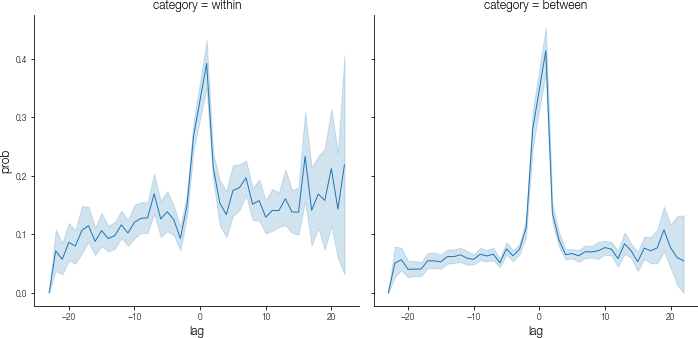

In [7]:
crps = pd.concat((within_crp, between_crp), keys=['within', 'between'], 
                 axis=0)
crps = crps.reset_index(level=0).rename(columns={'level_0': 'category'})
sns.relplot(kind='line', x='lag', y='prob', col='category', data=crps)

In [ ]:
sns.lineplot(x='lag', y='prob', 
             data=within_crp.query('-10 < lag < 0'), color='b');
sns.lineplot(x='lag', y='prob', 
             data=within_crp.query('10 > lag > 0'), color='b');